In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import kagglehub
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
path = kagglehub.dataset_download("sujalsuthar/amazon-delivery-dataset")

Using Colab cache for faster access to the 'amazon-delivery-dataset' dataset.


In [ ]:
for dirname, _, filenames in os.walk(path):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/amazon-delivery-dataset/amazon_delivery.csv
/kaggle/input/amazon-delivery-dataset/.nfs00000000645e707700000134


In [ ]:
df = pd.read_csv("/kaggle/input/amazon-delivery-dataset/amazon_delivery.csv")
df.head()

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category
0,ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,Sunny,High,motorcycle,Urban,120,Clothing
1,akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,Stormy,Jam,scooter,Metropolitian,165,Electronics
2,njpu434582536,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,Sandstorms,Low,motorcycle,Urban,130,Sports
3,rjto796129700,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,Sunny,Medium,motorcycle,Metropolitian,105,Cosmetics
4,zguw716275638,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,Cloudy,High,scooter,Metropolitian,150,Toys


In [ ]:
df.shape

(43739, 16)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43739 entries, 0 to 43738
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order_ID         43739 non-null  object 
 1   Agent_Age        43739 non-null  int64  
 2   Agent_Rating     43685 non-null  float64
 3   Store_Latitude   43739 non-null  float64
 4   Store_Longitude  43739 non-null  float64
 5   Drop_Latitude    43739 non-null  float64
 6   Drop_Longitude   43739 non-null  float64
 7   Order_Date       43739 non-null  object 
 8   Order_Time       43739 non-null  object 
 9   Pickup_Time      43739 non-null  object 
 10  Weather          43648 non-null  object 
 11  Traffic          43739 non-null  object 
 12  Vehicle          43739 non-null  object 
 13  Area             43739 non-null  object 
 14  Delivery_Time    43739 non-null  int64  
 15  Category         43739 non-null  object 
dtypes: float64(5), int64(2), object(9)
memory usage: 5.3+ MB


In [ ]:
df.describe()

,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Delivery_Time
count,43739.000000,43685.000000,43739.000000,43739.000000,43739.000000,43739.000000,43739.000000
mean,29.567137,4.633780,17.210960,70.661177,17.459031,70.821842,124.905645
std,5.815155,0.334716,7.764225,21.475005,7.342950,21.153148,51.915451
min,15.000000,1.000000,-30.902872,-88.366217,0.010000,0.010000,10.000000
25%,25.000000,4.500000,12.933298,73.170283,12.985996,73.280000,90.000000
50%,30.000000,4.700000,18.551440,75.898497,18.633626,76.002574,125.000000
75%,35.000000,4.900000,22.732225,78.045359,22.785049,78.104095,160.000000
max,50.000000,6.000000,30.914057,88.433452,31.054057,88.563452,270.000000


In [ ]:
df.isnull().sum()

,0
Order_ID,0
Agent_Age,0
Agent_Rating,54
Store_Latitude,0
Store_Longitude,0
Drop_Latitude,0
Drop_Longitude,0
Order_Date,0
Order_Time,0
Pickup_Time,0


In [ ]:
org_rows = df.shape[0]
df = df.dropna()
drop_rows = org_rows - df.shape[0]
print(f"Removed {drop_rows} rows due to missing values.")

Removed 145 rows due to missing values.


In [ ]:
df.shape

(43594, 16)

In [ ]:
df.head().T

,0,1,2,3,4
Order_ID,ialx566343618,akqg208421122,njpu434582536,rjto796129700,zguw716275638
Agent_Age,37,34,23,38,32
Agent_Rating,4.9,4.5,4.4,4.7,4.6
Store_Latitude,22.745049,12.913041,12.914264,11.003669,12.972793
Store_Longitude,75.892471,77.683237,77.6784,76.976494,80.249982
Drop_Latitude,22.765049,13.043041,12.924264,11.053669,13.012793
Drop_Longitude,75.912471,77.813237,77.6884,77.026494,80.289982
Order_Date,2022-03-19,2022-03-25,2022-03-19,2022-04-05,2022-03-26
Order_Time,11:30:00,19:45:00,08:30:00,18:00:00,13:30:00
Pickup_Time,11:45:00,19:50:00,08:45:00,18:10:00,13:45:00


## Distance Calcuation using Haversine formula

In [ ]:
# make sure latitude/longitude are numeric
for col in ['Store_Latitude','Store_Longitude','Drop_Latitude','Drop_Longitude']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# ensure missing values are handled (drop or fill) before computing
df = df.dropna(subset=['Store_Latitude','Store_Longitude','Drop_Latitude','Drop_Longitude'])

R = 6371  # Earth radius in km

def deg_to_rad(degrees):
    return degrees * (np.pi / 180)

def distcalculate(lat1, lon1, lat2, lon2):
    lat1, lon1, lat2, lon2 = map(deg_to_rad, [lat1, lon1, lat2, lon2])

    d_lat = lat2 - lat1
    d_lon = lon2 - lon1

    a = np.sin(d_lat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(d_lon/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))

    return R * c

# compute with iloc (position-based)
df['Distance'] = np.nan
for i in range(len(df)):
    lat1 = df.iloc[i]['Store_Latitude']
    lon1 = df.iloc[i]['Store_Longitude']
    lat2 = df.iloc[i]['Drop_Latitude']
    lon2 = df.iloc[i]['Drop_Longitude']
    df.iloc[i, df.columns.get_loc('Distance')] = distcalculate(lat1, lon1, lat2, lon2)


## Numerical Columns

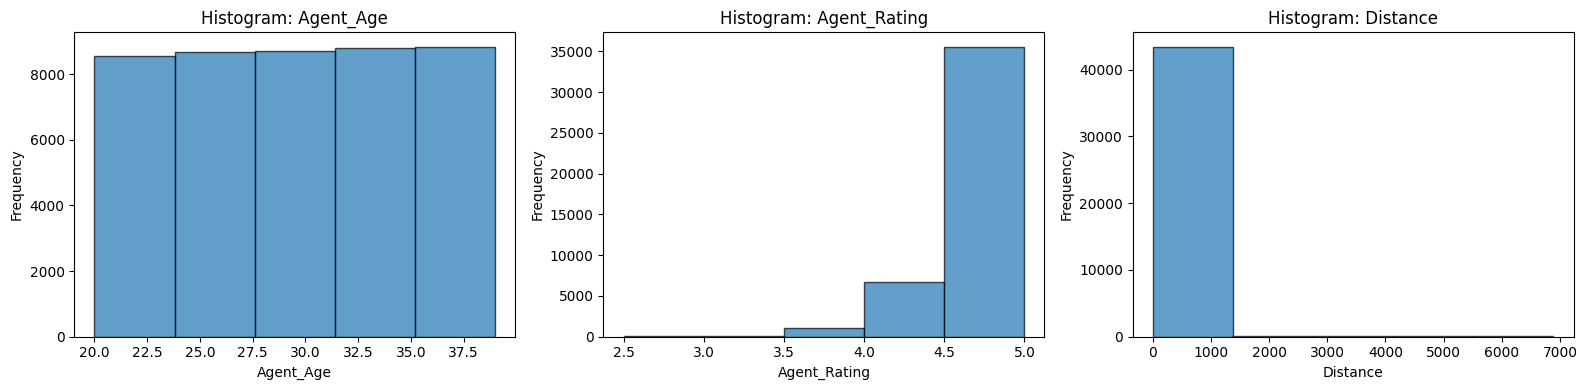

In [ ]:
numerical_cols = ['Agent_Age', 'Agent_Rating','Distance']
fig, axes = plt.subplots(1, 3, figsize=(16, 4))
axes = axes.ravel()
for idx, col in enumerate(numerical_cols):
    if col in numerical_cols:
        axes[idx].hist(df[col], bins=5, alpha=0.7, edgecolor='black')
        axes[idx].set_title(f'Histogram: {col}')
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

## Categorical Columns

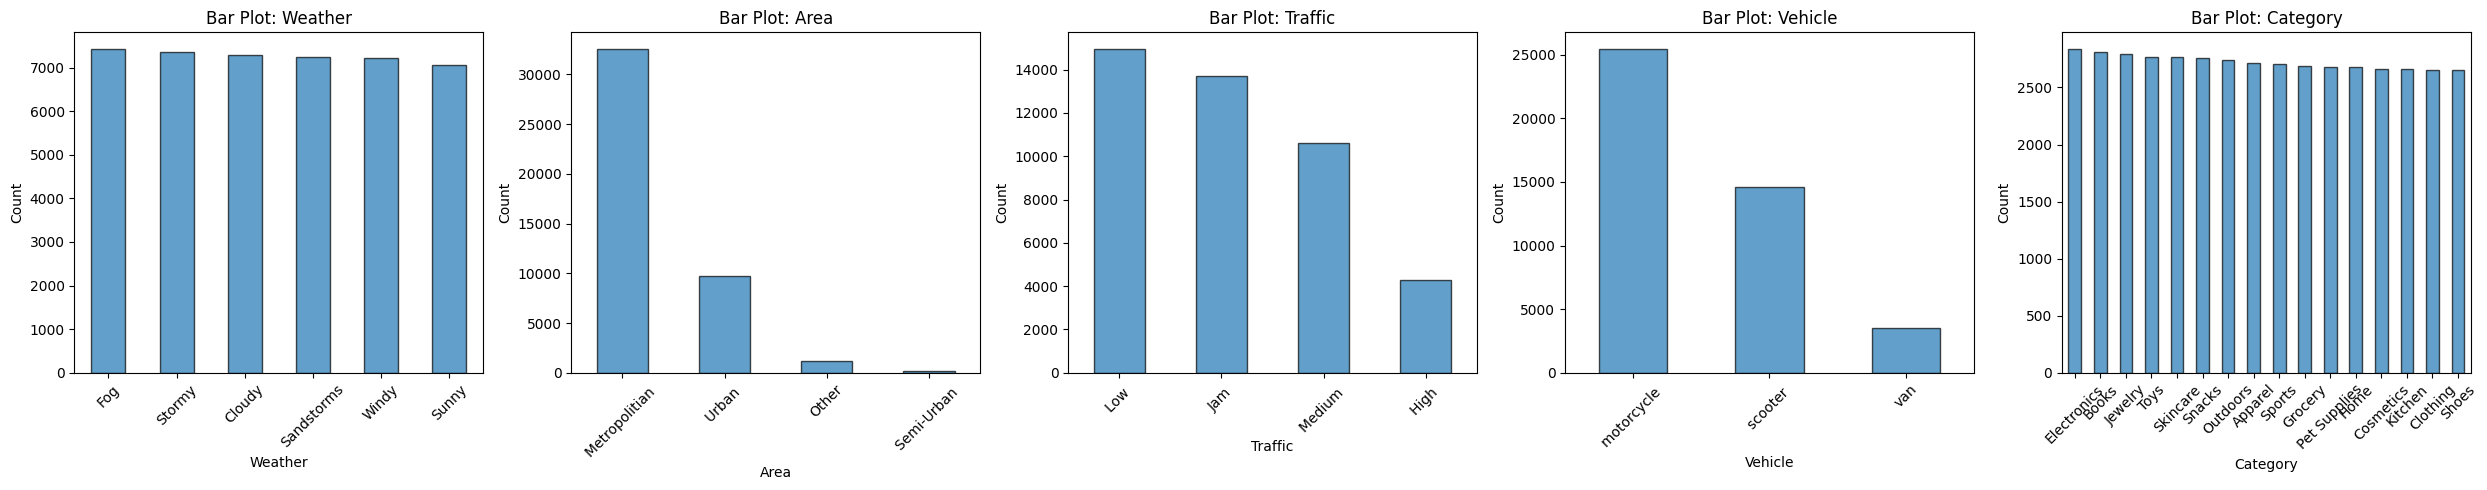

In [ ]:
categorical_cols = ['Weather','Area','Traffic','Vehicle','Category']
fig, axes = plt.subplots(1, 5, figsize=(25, 5))
for idx, col in enumerate(categorical_cols):
    df[col].value_counts().plot(kind='bar', ax=axes[idx], alpha=0.7, edgecolor='black')
    axes[idx].set_title(f'Bar Plot: {col}')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Count')
    axes[idx].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
print(df['Weather'].unique())
print(df['Area'].unique())
print(df['Traffic'].unique())
print(df['Vehicle'].unique())
print(df['Category'].unique())

['Sunny' 'Stormy' 'Sandstorms' 'Cloudy' 'Fog' 'Windy']
['Urban ' 'Metropolitian ' 'Semi-Urban ' 'Other']
['High ' 'Jam ' 'Low ' 'Medium ']
['motorcycle ' 'scooter ' 'van']
['Clothing' 'Electronics' 'Sports' 'Cosmetics' 'Toys' 'Snacks' 'Shoes'
 'Apparel' 'Jewelry' 'Outdoors' 'Grocery' 'Books' 'Kitchen' 'Home'
 'Pet Supplies' 'Skincare']


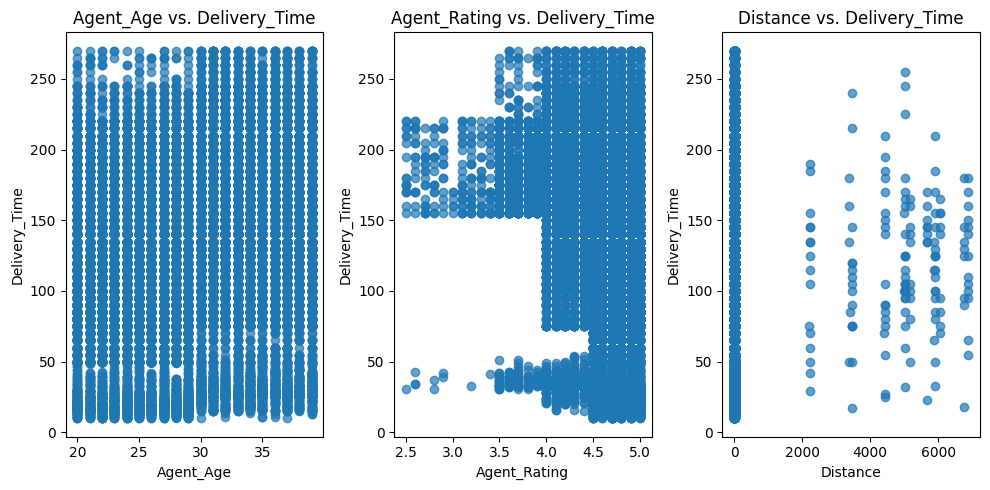

In [ ]:
fig, axes = plt.subplots(1,3, figsize=(10, 5))
axes = axes.ravel()
delivery_time_col = 'Delivery_Time'
for idx, col in enumerate(numerical_cols):
    if col != delivery_time_col and idx < len(axes):
        axes[idx].scatter(df[col], df[delivery_time_col], alpha=0.7)
        axes[idx].set_title(f'{col} vs. {delivery_time_col}')
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel(delivery_time_col)
plt.tight_layout()
plt.show()

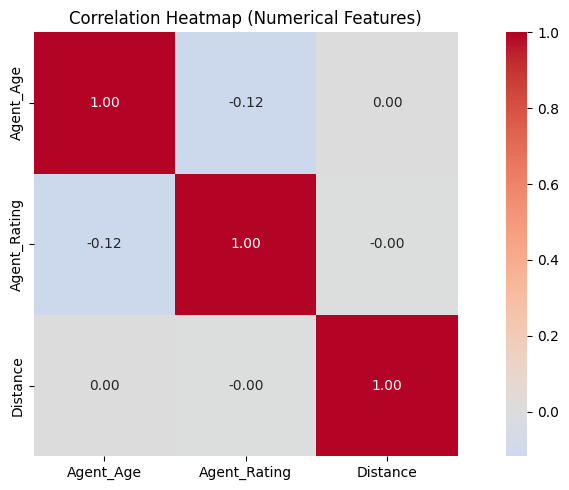

In [ ]:
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', center=0, square=True, fmt='.2f')
plt.title('Correlation Heatmap (Numerical Features)')
plt.tight_layout()
plt.show()

In [ ]:
X = df.drop(["Delivery_Time", "Order_ID", "Order_Date", "Order_Time", "Pickup_Time","Store_Latitude","Store_Longitude","Drop_Latitude","Drop_Longitude"], axis=1)
y = df["Delivery_Time"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43594 entries, 0 to 43738
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Agent_Age     43594 non-null  int64  
 1   Agent_Rating  43594 non-null  float64
 2   Weather       43594 non-null  object 
 3   Traffic       43594 non-null  object 
 4   Vehicle       43594 non-null  object 
 5   Area          43594 non-null  object 
 6   Category      43594 non-null  object 
 7   Distance      43594 non-null  float64
dtypes: float64(2), int64(1), object(5)
memory usage: 4.0+ MB


In [ ]:
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numerical_cols),
        ("cat", categorical_transformer, categorical_cols)
    ]
)


## Linear Regression

In [52]:
from sklearn.linear_model import LinearRegression

# Pipeline for Linear Regression
model = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("regressor", LinearRegression())
])

model.fit(X_train, y_train)
lr_predictions = model.predict(X_test)

In [ ]:
import pickle

# 'model' is the variable name of your trained Pipeline
filename = 'linear_regression_model.pkl'

# Open the file in 'wb' (write binary) mode and dump the model
with open(filename, 'wb') as file:
    pickle.dump(model, file)

print(f"Model successfully saved to {filename}")

Model successfully saved to linear_regression_model.pkl


In [ ]:
def metrics(y_test, predictions):
  mse = mean_squared_error(y_test, predictions)
  rmse = np.sqrt(mse)
  mae = mean_absolute_error(y_test, predictions)
  r2 = r2_score(y_test, predictions)

  # Adjusted R^2
  n = len(y_test)
  p = X_train.shape[1]  # number of original features
  adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

  # MAPE (Avoid division by zero)
  mape = np.mean(np.abs((y_test - predictions) / np.where(y_test==0, 1, y_test))) * 100

  print("RMSE:", rmse)
  print("MAE:", mae)
  print("R²:", r2)
  print("Adjusted R²:", adj_r2)
  print("MAPE (%):", mape)

metrics(y_test,lr_predictions)


RMSE: 33.30359284306704
MAE: 26.311834381807813
R²: 0.5782491300514191
Adjusted R²: 0.5778617584142677
MAPE (%): 27.96236072462939


In [ ]:
def plot_residuals(y_test, predictions):
  residuals = y_test - stacking_predictions

  # Plotting residuals vs. predicted values
  plt.figure(figsize=(12, 6))
  plt.subplot(1, 2, 1)
  sns.scatterplot(x=predictions, y=residuals, alpha=0.6)
  plt.axhline(y=0, color='r', linestyle='--')
  plt.title('Residuals vs. Predicted Values (Stacking Regressor)')
  plt.xlabel('Predicted Delivery Time')
  plt.ylabel('Residuals')

  # Plotting residuals vs. Distance (a key feature)
  plt.subplot(1, 2, 2)
  sns.scatterplot(x=X_test['Distance'], y=residuals, alpha=0.6)
  plt.axhline(y=0, color='r', linestyle='--')
  plt.title('Residuals vs. Distance (Model)')
  plt.xlabel('Distance')
  plt.ylabel('Residuals')

  plt.tight_layout()
  plt.show()

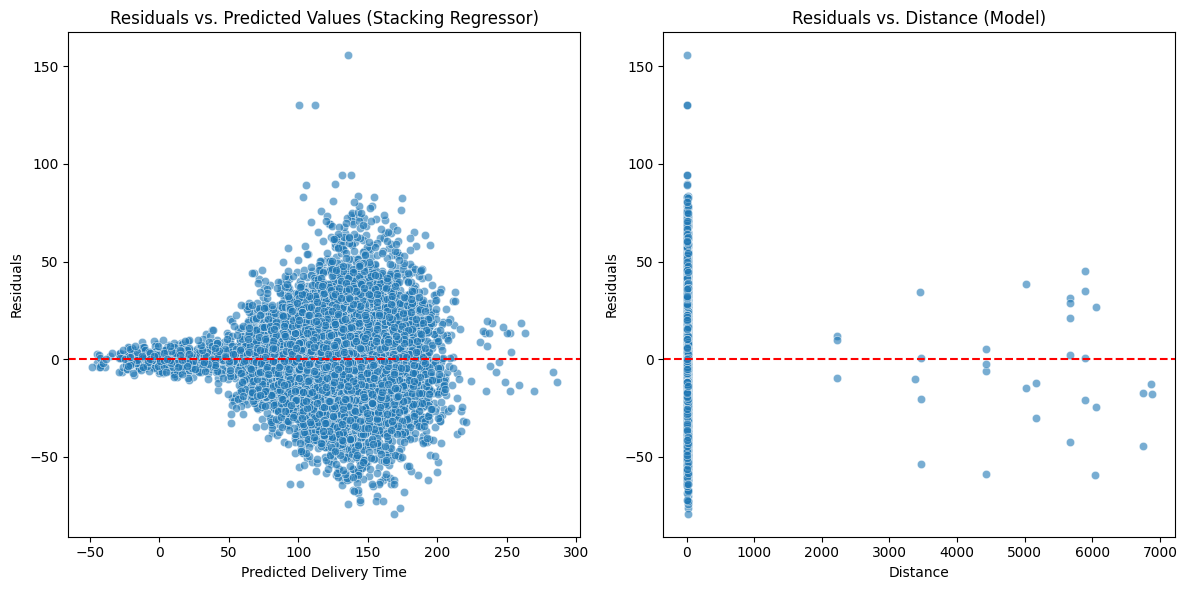

In [53]:
plot_residuals(y_test, lr_predictions)

## Ridge Regression

In [55]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

# ---- Pipeline with Ridge (estimator placeholder) ----
pipe = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("regressor", Ridge())
])

# ---- Hyperparameter tuning for alpha using GridSearchCV ----
param_grid = {
    "regressor__alpha": [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0],
    "regressor__tol": [1e-3, 1e-4]    # optional
}

gs = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    cv=5,
    scoring="neg_mean_squared_error",
    n_jobs=-1,
    verbose=1
)

# ---- Fit GridSearch on training data ----
gs.fit(X_train, y_train)

print("Best params:", gs.best_params_)
print("Best CV MSE (negative):", gs.best_score_)

# ---- Use best estimator to predict on test set ----
best_model = gs.best_estimator_
rr_predictions = best_model.predict(X_test)

Fitting 5 folds for each of 14 candidates, totalling 70 fits
Best params: {'regressor__alpha': 0.001, 'regressor__tol': 0.001}
Best CV MSE (negative): -1113.684280036101


In [ ]:
import pickle

# 1. Save the model (wb = write binary)
with open('my_ridge_regression_model.pkl', 'wb') as file:
    pickle.dump(gs, file)

print("Model saved successfully!")

Model saved successfully!


In [ ]:
metrics(y_test,rr_predictions)

RMSE: 33.304234997994335
MAE: 26.311644353415222
R²: 0.5782328656194373
Adjusted R²: 0.5778454790436572
MAPE (%): 27.962363787667183


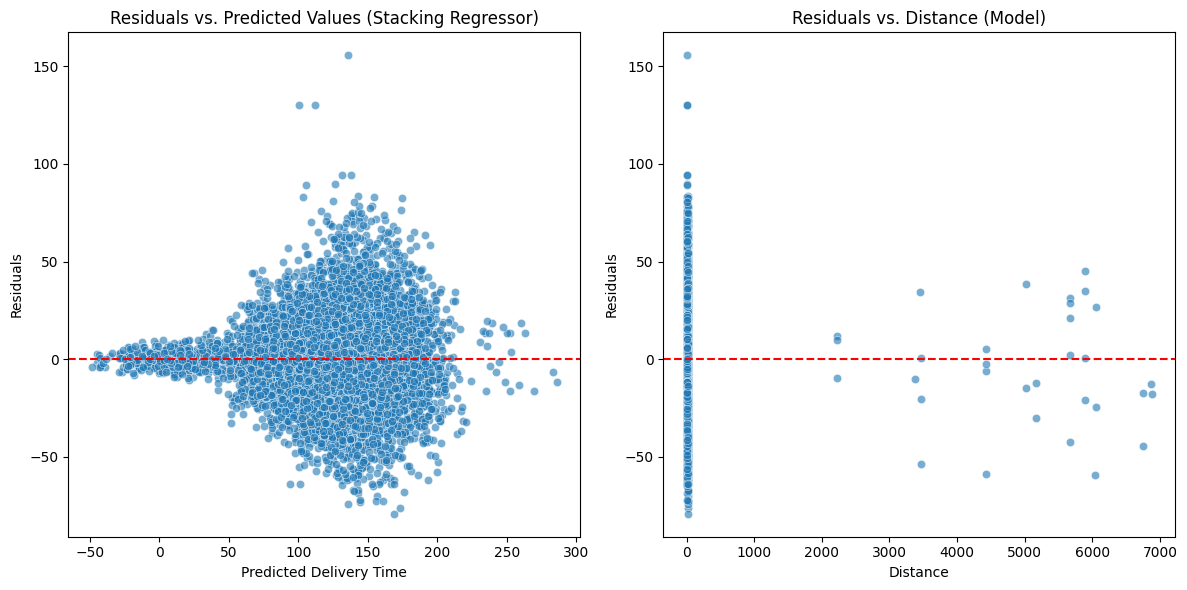

In [56]:
plot_residuals(y_test, rr_predictions)

## Random Forest Regressor

In [46]:
from sklearn.ensemble import RandomForestRegressor
import time

# 1. Define the Pipeline with fixed parameters
# We manually choose the settings (e.g., 200 trees) since we aren't searching anymore.
pipe = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("regressor", RandomForestRegressor(
        n_estimators=40,    # You can change this number manually
        random_state=42,
        n_jobs=-1            # Safe to use -1 here! (No outer loop conflict)
    ))
])

# 2. Train the pipeline directly
print("Starting training...")
start = time.time()

pipe.fit(X_train, y_train)

print("Training time:", time.time() - start)

# 3. Make Predictions
rfr_predictions = pipe.predict(X_test)
print("Predictions generated.")

Starting training...
Training time: 8.689079761505127
Predictions generated.


In [47]:
metrics(y_test,rfr_predictions)

RMSE: 23.1124223877626
MAE: 17.639680821577397
R²: 0.7968743622426482
Adjusted R²: 0.7966877944926989
MAPE (%): 16.162879318223926


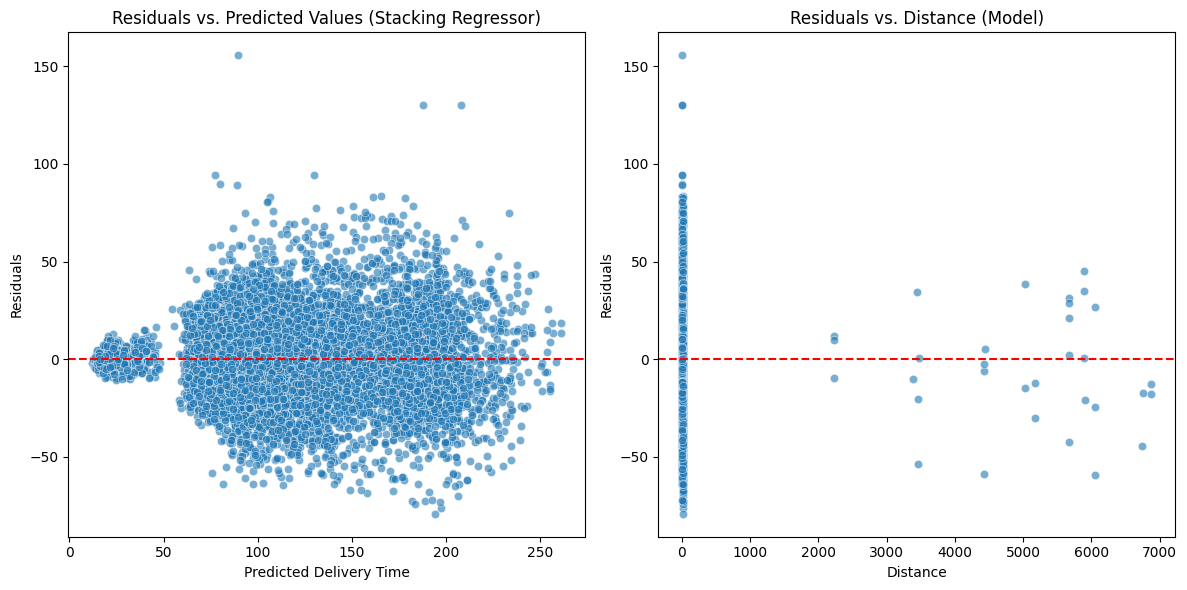

In [57]:
plot_residuals(y_test, rfr_predictions)

In [48]:
import pickle

# 1. Save the model (wb = write binary)
with open('my_random_forest_model.pkl', 'wb') as file:
    pickle.dump(pipe, file)

print("Model saved successfully!")

Model saved successfully!


## XGBoost

In [ ]:
from xgboost import XGBRegressor

xgb_pipe = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("regressor", XGBRegressor(objective="reg:squarederror", random_state=42, n_jobs=-1, verbosity=0))
])

param_dist_xgb = {
    "regressor__n_estimators": [100, 200, 400, 800],
    "regressor__learning_rate": [0.001, 0.01, 0.03, 0.05, 0.1],
    "regressor__max_depth": [3, 4, 6, 8, 10],
    "regressor__subsample": [0.5, 0.7, 0.8, 1.0],
    "regressor__colsample_bytree": [0.4, 0.6, 0.8, 1.0],
    "regressor__reg_alpha": [0, 1e-3, 1e-2, 0.1, 1],
    "regressor__reg_lambda": [0.1, 1, 10]
}

rs_xgb = RandomizedSearchCV(
    estimator=xgb_pipe,
    param_distributions=param_dist_xgb,
    n_iter=50,
    cv=5,
    scoring="neg_mean_squared_error",
    n_jobs=-1,
    random_state=42,
    verbose=1
)

start = time.time()
rs_xgb.fit(X_train, y_train)
print("XGB RandomizedSearch time:", time.time() - start)
print("Best params (XGB):", rs_xgb.best_params_)
print("Best CV (neg MSE):", rs_xgb.best_score_)

best_xgb = rs_xgb.best_estimator_
xgb_predictions = best_xgb.predict(X_test)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


In [ ]:
import pickle

# 1. Save the model (wb = write binary)
with open('my_xgb_model.pkl', 'wb') as file:
    pickle.dump(rs_xgb, file)

print("Model saved successfully!")

In [ ]:
metrics(y_test,xgb_predictions)

RMSE: 22.165352612699678
MAE: 17.197364807128906
R²: 0.8131800889968872
Adjusted R²: 0.8130084978042322
MAPE (%): 15.939396168268017


In [58]:
plot_residuals(y_test, xgb_predictions)

NameError: name 'xgb_predictions' is not defined

## Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

pipe_gb = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("regressor", GradientBoostingRegressor(random_state=42))
])

param_dist_gb = {
    "regressor__n_estimators": [100, 200, 400, 800],
    "regressor__learning_rate": [0.01, 0.03, 0.05, 0.1],
    "regressor__max_depth": [3, 4, 6, 8],
    "regressor__min_samples_split": [2, 5, 10],
    "regressor__min_samples_leaf": [1, 2, 4],
    "regressor__subsample": [0.6, 0.8, 1.0],
    "regressor__max_features": [None, "sqrt", "log2"]
}

rs_gb = RandomizedSearchCV(
    estimator=pipe_gb,
    param_distributions=param_dist_gb,
    n_iter=40,
    cv=5,
    scoring="neg_mean_squared_error",
    n_jobs=-1,
    random_state=42,
    verbose=1
)

start = time.time()
rs_gb.fit(X_train, y_train)
print("GB RandomizedSearch time:", time.time() - start)
print("Best params (GB):", rs_gb.best_params_)
print("Best CV (neg MSE):", rs_gb.best_score_)

best_gb = rs_gb.best_estimator_
gb_predictions = best_gb.predict(X_test)

# Metrics
mse = mean_squared_error(y_test, pred_gb)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, pred_gb)
r2 = r2_score(y_test, pred_gb)
n = len(y_test)

try:
    p = len(best_gb.named_steps["preprocess"].get_feature_names_out())
except Exception:
    p = X_train.shape[1]
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

In [ ]:
import pickle

# 1. Save the model (wb = write binary)
with open('my_model.pkl', 'wb') as file:
    pickle.dump(rs_gs, file)

print("Model saved successfully!")

In [ ]:
metrics(y_test,gb_predictions)

In [ ]:
# Feature importances
importances = best_gb.named_steps["regressor"].feature_importances_
try:
    feat_names = best_gb.named_steps["preprocess"].get_feature_names_out()
    feat_imp_df = pd.DataFrame({"feature": feat_names, "importance": importances})
    feat_imp_df = feat_imp_df.sort_values("importance", ascending=False).reset_index(drop=True)
    print(feat_imp_df.head(30))
except Exception:
    print("Feature importances (no names):", importances)

**Stacked Regressor**

In [35]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 7.2 MB/s eta 0:00:00


In [42]:
from sklearn.ensemble import StackingRegressor, GradientBoostingRegressor
from catboost import CatBoostRegressor
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.pipeline import Pipeline

# create named estimators list (name, estimator)
estimators = [
    ("catboost", CatBoostRegressor(random_state=42, verbose=0)),
    ("linear", LinearRegression()),
    ("bayesian", BayesianRidge()),
    ("gbr", GradientBoostingRegressor(random_state=42))
]

# corrected stacking regressor: use 'estimators', 'final_estimator' and 'passthrough'
stack_gen = StackingRegressor(
    estimators=estimators,
    final_estimator=CatBoostRegressor(random_state=42, verbose=0),
    passthrough=True,   # pass original features to the final estimator
    cv=5,
    n_jobs=-1
)

# Create a new pipeline named stacking_model
stacking_model = Pipeline(steps=[
    ("preprocess", preprocessor),  # ensure `preprocessor` is defined earlier
    ("regressor", stack_gen)
])

# Fit the stacking_model to the training data
print("Fitting Stacking Regressor model...")
stacking_model.fit(X_train, y_train)
print("Stacking Regressor model fitted.")

# Make predictions on the test data
stacking_predictions = stacking_model.predict(X_test)
print("Predictions made.")


Fitting Stacking Regressor model...
Stacking Regressor model fitted.
Predictions made.


In [44]:
import pickle

# 1. Save the model (wb = write binary)
with open('my_stacking_model.pkl', 'wb') as file:
    pickle.dump(stacking_model, file)

print("Model saved successfully!")

Model saved successfully!


In [43]:
metrics(y_test, stacking_predictions)

RMSE: 21.952645424487418
MAE: 16.97922296511224
R²: 0.8167485009832998
Adjusted R²: 0.816580187321746
MAPE (%): 15.66810870838346


## Evaluate Stacking Regressor Performance

## Residual Plots

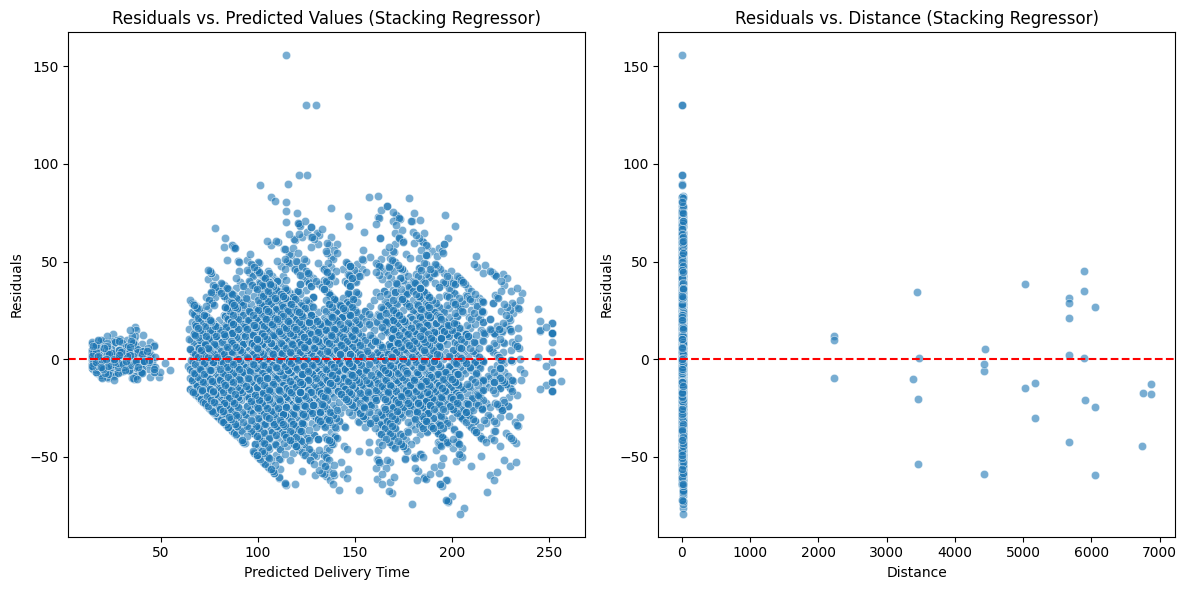

In [ ]:
residuals = y_test - stacking_predictions

# Plotting residuals vs. predicted values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x=stacking_predictions, y=residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs. Predicted Values (Stacking Regressor)')
plt.xlabel('Predicted Delivery Time')
plt.ylabel('Residuals')

# Plotting residuals vs. Distance (a key feature)
plt.subplot(1, 2, 2)
sns.scatterplot(x=X_test['Distance'], y=residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs. Distance (Stacking Regressor)')
plt.xlabel('Distance')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()